## Decomposition Exercise

In [13]:
# import pandas
import pandas as pd
import numpy as np
import random as rand

# import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(palette='viridis')


In [14]:
# load data
data = sm.datasets.co2.load_pandas()
co2 = data.data

* print the top 5 rows

In [15]:
co2.head(5)

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


* Resample the time series using monthly averages and store the new time series as a Series `y`.

In [16]:
y = co2.resample('M').sum()

* print the top 5 rows of 'y'

In [17]:
y.head(5)

,co2
1958-03-31,316.1
1958-04-30,1268.8
1958-05-31,952.3
1958-06-30,0.0
1958-07-31,1262.5


* check for missing values

In [18]:
y.isnull().sum()

co2    0
dtype: int64

* replace missing values with last available value


    - Example: If Feb 2010 is missing, use the value from Jan 2010.

In [19]:
y_shifted = pd.DataFrame([shift if value == 0 else value for value, shift in zip(y.values, y.shift(-1).values)], index=y.index, columns=['co2'])

In [20]:
y[y['co2'] == 0]

,co2
1958-06-30,0.0
1958-10-31,0.0
1964-02-29,0.0
1964-03-31,0.0
1964-04-30,0.0


In [21]:
y_shifted[y_shifted['co2'] == 0]

,co2
1964-02-29,0.0
1964-03-31,0.0


In [22]:
y_shifted = pd.DataFrame([shift if value == 0 else value for value, shift in zip(y_shifted.values, y_shifted.shift(-1).values)], index=y.index, columns=['co2'])

In [23]:
y_shifted[y_shifted['co2'] == 0]

,co2
1964-02-29,0.0


In [24]:
y_shifted = pd.DataFrame([shift if value == 0 else value for value, shift in zip(y_shifted.values, y_shifted.shift(-1).values)], index=y.index, columns=['co2'])

In [25]:
y_shifted[y_shifted['co2'] == 0]

,co2


* plot the time series `y`

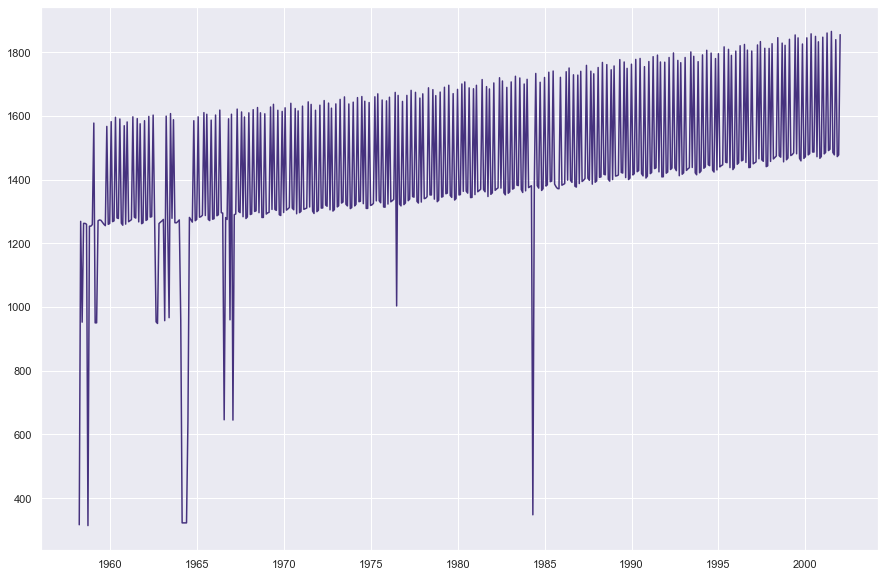

In [29]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(y_shifted)
plt.show()

* Apply and plot the following:


    1. additive seasonal decomposition
    2. multiplicative seasonal decomposition

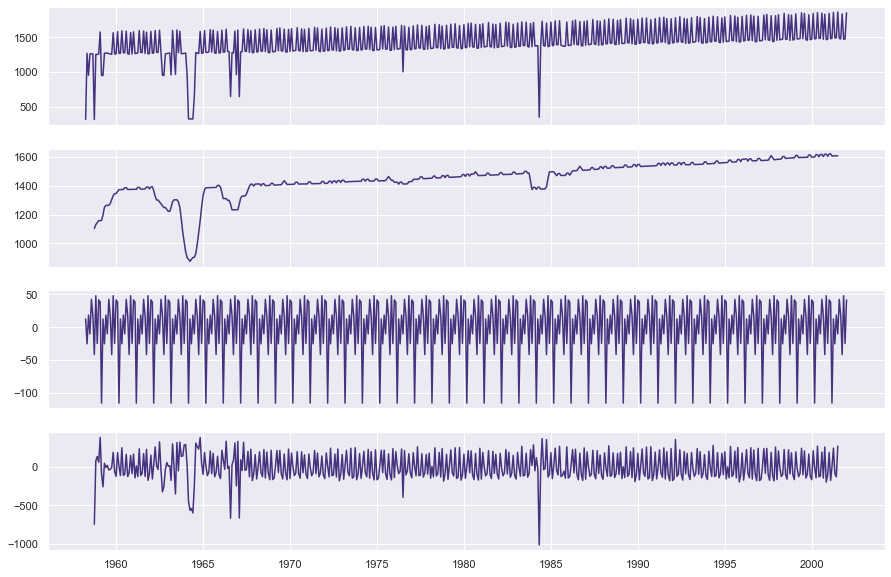

In [43]:
result = seasonal_decompose(y_shifted, model='additive', period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(15,10), sharex=True)

ax1.plot(result.observed)
# ax1.set_xticks(yearly)
ax2.plot(result.trend)
# ax2.set_xticks(yearly)
ax3.plot(result.seasonal)
# ax3.set_xticks(yearly)
ax4.plot(result.resid)
# ax4.set_xticks(yearly)
plt.show()

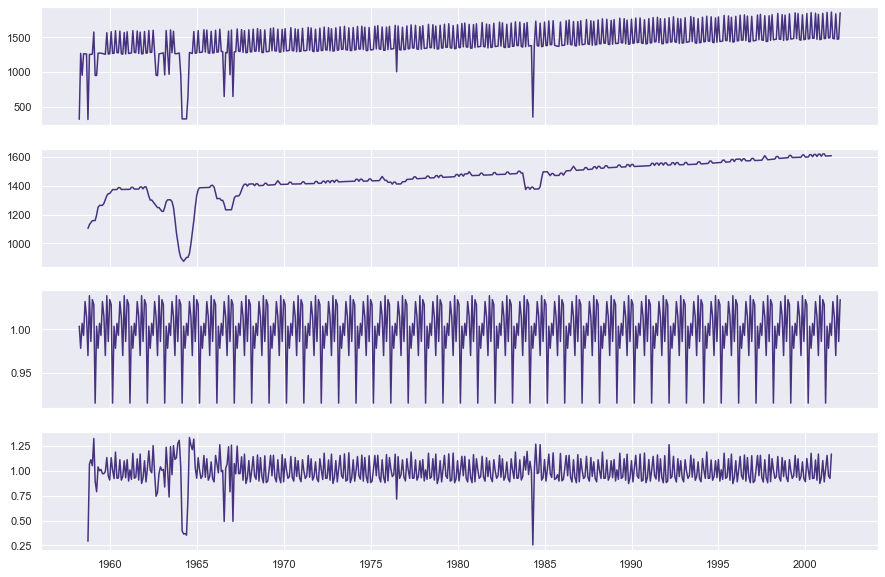

In [36]:
result = seasonal_decompose(y_shifted, model='multiplicative', period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(15,10), sharex=True)

ax1.plot(result.observed)
# ax1.set_xticks(yearly)
ax2.plot(result.trend)
# ax2.set_xticks(yearly)
ax3.plot(result.seasonal)
# ax3.set_xticks(yearly)
ax4.plot(result.resid)
# ax4.set_xticks(yearly)
plt.show()